## Setting Up the Data

In [35]:
import pandas as pd
import numpy as np

In [36]:
crime = pd.read_csv('FE1_NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
crime.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
Start_Dt_Tm           object
End_Dt_Tm             object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime       

In [38]:
crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0


In [39]:
#Create categorical list of all 68 possible offenses
#4 types of crime: Personal, Property, Statutory/State, and Other

#Personal - Assault, Battery, Abuse, Kidnapping, Rape, Homicide, Harrassment
personal_list = ['ASSAULT', 'BATTERY', 'MURDER', 'MANSLAUGHTER', 'HARRASSMENT', 'KIDNAPPING', 'RAPE', 'SEX', 'HOMICIDE', 'WEAPON', 'WEAPONS', 'PERSON']

#Property - Arson, Theft, Mischief, Burglary, Larceny, Robbery, Forgery, Embezzlement, Shoplifting, Trespass, Fraud/Financial
property_list = ['ARSON', 'THEFT', 'THEF', 'MISCHIEF', 'ROBBERY', 'BURGLARY', 'JOSTLING', 'TOOLS', 'FRAUD', 'FRAUDS', 'FRAUDULENT', 'LARCENY', 'FORGERY', 'STOLEN', 'UNAUTHORIZED', 'TRESPASS']

#Statutory - State-Related offenses, DUI, DWI, Gambling, Loitering, Drug, Traffic, Public Servant/Admin-related crimes
statutory_list = ['DRUGS', 'DRUG', 'SENSBLTY', 'PENAL', 'PUBLIC', 'INTOXICATED', 'TRAFFIC', 'ADMINISTRATIVE', 'GAMBLING', 'PROSTITUTION', 'ALCOHOLIC', 'DISORDERLY']

#Violent vs Non-Violent
violent = personal_list
non_violent = property_list + statutory_list

In [40]:
#Replace all Hyphons and forward slashes with spaces
def string_replace(column):
    
    newstrings = []
    
    for string in column:
        for word in string:
            if word == '-':
                newstrings.append(string.replace('-', ' '))
                break
            elif word == '/':
                newstrings.append(string.replace('/', ' '))
                break
        else:
            newstrings.append(string)
                
    
    return ''.join(newstrings)

def crime_apply(string):
    
    for word in string.split():
        if word in violent:
            return "Violent Crime"
        elif word in non_violent:
            return "Non-Violent Crime"
    else:
        pass

Running the function to create the correct buckets

In [41]:
#Remove NA's before applying Algo.. only removes about 2-3k observations
crime = crime[crime['OFNS_DESC'].notna()] 
crime['OFNS_DESC'] = crime.apply(lambda x: string_replace(x['OFNS_DESC']), axis = 1)
crime['OFNS_DESC_TYPE'] = crime.apply(lambda x: crime_apply(x['OFNS_DESC']), axis = 1)
crime.head(15)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,OFNS_DESC_TYPE
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0,Non-Violent Crime
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON NEGL. MANSLAUGHTER,NaN,NaN,...,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0,Violent Crime
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0,Non-Violent Crime
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0,Violent Crime
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0,Violent Crime
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,December,31.0,2015.0,Short,Winter,Late Night,46.0,6.0,5.0,Violent Crime
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,December,31.0,2015.0,NaN,Winter,Late Night,55.0,5.0,6.0,Non-Violent Crime
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,...,December,31.0,2015.0,NaN,Winter,Late Night,87.0,7.0,9.0,Violent Crime
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,December,31.0,2015.0,Short,Winter,Late Night,87.0,7.0,9.0,Violent Crime
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,December,31.0,2015.0,NaN,Winter,Late Night,66.0,6.0,7.0,Non-Violent Crime


In [42]:
#Value Counts by Crime Type
crime['OFNS_DESC_TYPE'].value_counts()

Non-Violent Crime    710987
Violent Crime        333129
Name: OFNS_DESC_TYPE, dtype: int64

In [43]:
#Drop the variables that are extraneous or duplicitous based on EDA
if 'CMPLNT_FR_DT' in crime:
    del crime['CMPLNT_FR_DT']
if 'CMPLNT_FR_TM' in crime:
    del crime['CMPLNT_FR_TM']
if 'CMPLNT_TO_DT' in crime:
    del crime['CMPLNT_TO_DT']
if 'CMPLNT_TO_TM' in crime:
    del crime['CMPLNT_TO_TM']
if 'PARKS_NM' in crime:
    del crime['PARKS_NM']
if 'HADEVELOPT' in crime:
    del crime['HADEVELOPT']  
if 'End_Dt_Tm' in crime:
    del crime['End_Dt_Tm']  
if 'CMPLNT_NUM' in crime:
    del crime['CMPLNT_NUM']
if 'KY_CD' in crime:
    del crime['KY_CD']
if 'RPT_DT' in crime:
    del crime['RPT_DT']
if 'PD_CD' in crime:
    del crime['PD_CD']
if 'PD_DESC' in crime:
    del crime['PD_DESC']
if 'X_COORD_CD' in crime:
    del crime['X_COORD_CD']
if 'Y_COORD_CD' in crime:
    del crime['Y_COORD_CD']
if 'Latitude' in crime:
    del crime['Latitude']
if 'Longitude' in crime:
    del crime['Longitude']
if 'Lat_Lon' in crime:
    del crime['Lat_Lon']
if 'OFNS_DESC' in crime:
    del crime['OFNS_DESC']

In [44]:
#dropping any remaining NANs
crime = crime.dropna() 

In [45]:
crime.isnull().values.any()

False

In [46]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586995 entries, 4 to 1048573
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CRM_ATPT_CPTD_CD   586995 non-null  object 
 1   LAW_CAT_CD         586995 non-null  object 
 2   JURIS_DESC         586995 non-null  object 
 3   BORO_NM            586995 non-null  object 
 4   ADDR_PCT_CD        586995 non-null  float64
 5   LOC_OF_OCCUR_DESC  586995 non-null  object 
 6   PREM_TYP_DESC      586995 non-null  object 
 7   Start_Dt_Tm        586995 non-null  object 
 8   Day_Name           586995 non-null  object 
 9   Duration           586995 non-null  float64
 10  Duration_to_PD     586995 non-null  float64
 11  Month              586995 non-null  object 
 12  Day                586995 non-null  float64
 13  Year               586995 non-null  float64
 14  Duration_lbl       586995 non-null  object 
 15  Season             586995 non-null  object 
 16  D

In [47]:
# replace the current Violent Crime classification atribute with something slightly more intuitive and readable
crime['NonViolent'] = crime.OFNS_DESC_TYPE=='Non-Violent Crime' 
crime.NonViolent = crime.NonViolent.astype(np.int)

In [48]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [49]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586995 entries, 4 to 1048573
Columns: 229 entries, CRM_ATPT_CPTD_CD to Daytime_Night
dtypes: float64(8), int32(1), object(13), uint8(207)
memory usage: 216.6+ MB


In [50]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

In [51]:
#Drop categories not using
if 'CRM_ATPT_CPTD_CD' in crime:    
    del crime['CRM_ATPT_CPTD_CD']   
if 'LAW_CAT_CD' in crime:
    del crime['LAW_CAT_CD']
if 'Start_Dt_Tm' in crime:
    del crime['Start_Dt_Tm']

In [52]:
if 'OFNS_DESC_TYPE' in crime:
    del crime['OFNS_DESC_TYPE']

In [53]:
pd.set_option('display.max_rows', 300)
crime.dtypes

Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                                       float64
GeoCell_X                                     float64
GeoCell_Y                                     float64
NonViolent                                      int32
JURIS_DESC_AMTRACK                              uint8
JURIS_DESC_DEPT OF CORRECTIONS                  uint8
JURIS_DESC_HEALTH & HOSP CORP                   uint8
JURIS_DESC_LONG ISLAND RAILRD                   uint8
JURIS_DESC_METRO NORTH                          uint8
JURIS_DESC_N.Y. HOUSING POLICE                  uint8
JURIS_DESC_N.Y. POLICE DEPT                     uint8
JURIS_DESC_N.Y. STATE PARKS                     uint8
JURIS_DESC_N.Y. STATE POLICE                    uint8
JURIS_DESC_N.Y. TRANSIT POLICE                  uint8
JURIS_DESC_NEW YORK CITY SHE

In [54]:
#data speed of processing merits a sample run first
crime_sample = crime.sample(10000)
#also setting aside a copy for the smaller variable list before I separate out X,y
crime_sm = crime

In [55]:
crime_sm.dtypes

Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                                       float64
GeoCell_X                                     float64
GeoCell_Y                                     float64
NonViolent                                      int32
JURIS_DESC_AMTRACK                              uint8
JURIS_DESC_DEPT OF CORRECTIONS                  uint8
JURIS_DESC_HEALTH & HOSP CORP                   uint8
JURIS_DESC_LONG ISLAND RAILRD                   uint8
JURIS_DESC_METRO NORTH                          uint8
JURIS_DESC_N.Y. HOUSING POLICE                  uint8
JURIS_DESC_N.Y. POLICE DEPT                     uint8
JURIS_DESC_N.Y. STATE PARKS                     uint8
JURIS_DESC_N.Y. STATE POLICE                    uint8
JURIS_DESC_N.Y. TRANSIT POLICE                  uint8
JURIS_DESC_NEW YORK CITY SHE

## Logistic Regression Model 1

In [22]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'NonViolent' in crime:
    y = crime['NonViolent'].values # get the labels we want
    del crime['NonViolent'] # get rid of the class label
    X = crime.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn

In [23]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [24]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.7278171023603267
confusion matrix
 [[15616 20427]
 [11527 69829]]
====Iteration 1  ====
accuracy 0.7303724903959999
confusion matrix
 [[16098 20154]
 [11500 69647]]
====Iteration 2  ====
accuracy 0.7294269968228009
confusion matrix
 [[15989 20124]
 [11641 69645]]


In [25]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.7319227591376417
confusion matrix
 [[15326 20971]
 [10501 70601]]
====Iteration 1  ====
accuracy 0.7289159192156662
confusion matrix
 [[15521 20887]
 [10938 70053]]
====Iteration 2  ====
accuracy 0.727987461562705
confusion matrix
 [[15043 21112]
 [10822 70422]]


In [26]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.7297592  0.72840484 0.72988697]


In [27]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

In [28]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = crime.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

Duration has weight of 0.22888545391699044
Duration_to_PD has weight of 0.0003083389399473278
Day has weight of -0.0005578248661399975
Year has weight of 0.00034283928997680125
GeoCell has weight of 0.0004836755795299035
GeoCell_X has weight of -0.03269548537404137
GeoCell_Y has weight of 0.003917695004703171
JURIS_DESC_AMTRACK has weight of 0.000754762867585869
JURIS_DESC_DEPT OF CORRECTIONS has weight of 0.025701008566092334
JURIS_DESC_HEALTH & HOSP CORP has weight of -0.05768928607812088
JURIS_DESC_LONG ISLAND RAILRD has weight of 0.0015066855030212232
JURIS_DESC_METRO NORTH has weight of -0.0004337036998636827
JURIS_DESC_N.Y. HOUSING POLICE has weight of -0.3732272783754144
JURIS_DESC_N.Y. POLICE DEPT has weight of 0.23652176363805918
JURIS_DESC_N.Y. STATE PARKS has weight of -3.8775622174835144e-05
JURIS_DESC_N.Y. STATE POLICE has weight of 0.04062157335647109
JURIS_DESC_N.Y. TRANSIT POLICE has weight of 0.0013319301600388006
JURIS_DESC_NEW YORK CITY SHERIFF OFFICE has weight of 0

In [29]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,crime.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.7330897196739324
[[16967 19146]
 [12189 69097]]
Duration_lbl_Long has weight of -0.742654282923415
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of -0.33197453364225143
PREM_TYP_DESC_RESIDENCE-HOUSE has weight of -0.1772641502386166
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of -0.17002250203340727
PREM_TYP_DESC_PUBLIC SCHOOL has weight of -0.11727946893059213
LOC_OF_OCCUR_DESC_INSIDE has weight of -0.09451033140367833
Day_Name_Sunday has weight of -0.06136880405927202
GeoCell_X has weight of -0.04853141204537784
PREM_TYP_DESC_OTHER has weight of -0.04626045771334238
ADDR_PCT_CD_67.0 has weight of -0.044488547347460994
PREM_TYP_DESC_HOSPITAL has weight of -0.044475790635538116
Year has weight of -0.03968435215529962
BORO_NM_STATEN ISLAND has weight of -0.02977864199569738
ADDR_PCT_CD_34.0 has weight of -0.028801841540256067
ADDR_PCT_CD_30.0 has weight of -0.027121244349879108
BORO_NM_BRONX has weight of -0.026359699393494442
ADDR_PCT_CD_120.0 has weight of -0.026

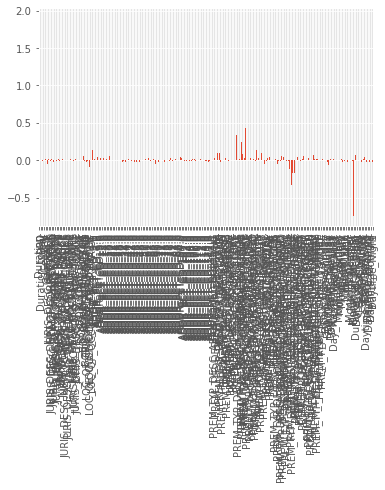

In [30]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=crime.columns)
weights.plot(kind='bar')
plt.show()

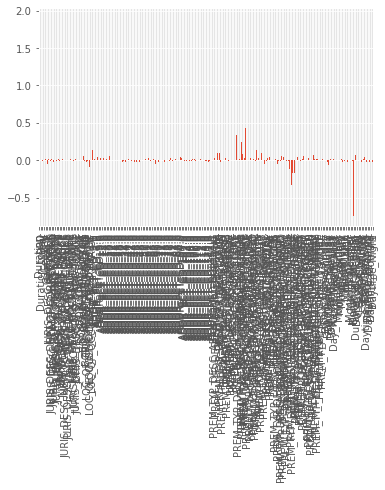

In [31]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=crime.columns)
weights.plot(kind='bar')
plt.show()

In [32]:
zip_vars

[(array([-0.74265428]), 'Duration_lbl_Long'),
 (array([-0.33197453]), 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE'),
 (array([-0.17726415]), 'PREM_TYP_DESC_RESIDENCE-HOUSE'),
 (array([-0.1700225]), 'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING'),
 (array([-0.11727947]), 'PREM_TYP_DESC_PUBLIC SCHOOL'),
 (array([-0.09451033]), 'LOC_OF_OCCUR_DESC_INSIDE'),
 (array([-0.0613688]), 'Day_Name_Sunday'),
 (array([-0.04853141]), 'GeoCell_X'),
 (array([-0.04626046]), 'PREM_TYP_DESC_OTHER'),
 (array([-0.04448855]), 'ADDR_PCT_CD_67.0'),
 (array([-0.04447579]), 'PREM_TYP_DESC_HOSPITAL'),
 (array([-0.03968435]), 'Year'),
 (array([-0.02977864]), 'BORO_NM_STATEN ISLAND'),
 (array([-0.02880184]), 'ADDR_PCT_CD_34.0'),
 (array([-0.02712124]), 'ADDR_PCT_CD_30.0'),
 (array([-0.0263597]), 'BORO_NM_BRONX'),
 (array([-0.0263033]), 'ADDR_PCT_CD_120.0'),
 (array([-0.02477558]), 'ADDR_PCT_CD_69.0'),
 (array([-0.02470548]), 'Daytime_Late Night'),
 (array([-0.02413925]), 'ADDR_PCT_CD_73.0'),
 (array([-0.0224182]), 'Daytime_E

## Logistic Regression Model 2

Using a subset of variables based on an importance threshold

In [56]:
#Now I want to pare down the variables - cutting off at <> .03%
crime_sm = crime_sm[['Duration_lbl_Long', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 
     'PREM_TYP_DESC_PUBLIC SCHOOL', 'LOC_OF_OCCUR_DESC_INSIDE', 'Day_Name_Sunday', 'PREM_TYP_DESC_OTHER', 'PREM_TYP_DESC_HOSPITAL', 
     'ADDR_PCT_CD_67.0', 'Year','GeoCell_X', 'PREM_TYP_DESC_TAXI (YELLOW LICENSED)', 'PREM_TYP_DESC_CONSTRUCTION SITE', 
     'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'PREM_TYP_DESC_GAS STATION', 'ADDR_PCT_CD_9.0', 'ADDR_PCT_CD_13.0', 'PREM_TYP_DESC_RESTAURANT/DINER', 
     'PREM_TYP_DESC_JEWELRY', 'PREM_TYP_DESC_ABANDONED BUILDING', 'ADDR_PCT_CD_6.0', 'ADDR_PCT_CD_14.0', 'PREM_TYP_DESC_LIQUOR STORE', 
     'Daytime_Day', 'PREM_TYP_DESC_SHOE', 'ADDR_PCT_CD_90.0', 'PREM_TYP_DESC_VARIETY STORE', 'PREM_TYP_DESC_SMALL MERCHANT', 
      'PREM_TYP_DESC_PARKING LOT/GARAGE (PUBLIC)', 'BORO_NM_MANHATTAN', 'PREM_TYP_DESC_CHECK CASHING BUSINESS', 
     'PREM_TYP_DESC_STORE UNCLASSIFIED', 'ADDR_PCT_CD_19.0', 'PREM_TYP_DESC_TELECOMM. STORE', 'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 
     'Duration_lbl_Medium', 'PREM_TYP_DESC_COMMERCIAL BUILDING', 'PREM_TYP_DESC_GYM/FITNESS FACILITY', 'PREM_TYP_DESC_ATM', 
      'PREM_TYP_DESC_BANK', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_DESC_REAR OF', 'PREM_TYP_DESC_FOOD SUPERMARKET', 
     'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_DRUG STORE', 'PREM_TYP_DESC_CHAIN STORE', 'Duration_lbl_Short', 
     'PREM_TYP_DESC_DEPARTMENT STORE', 'Duration','NonViolent']]

In [57]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'NonViolent' in crime_sm:
    y = crime_sm['NonViolent'].values # get the labels we want
    del crime_sm['NonViolent'] # get rid of the class label
    X = crime_sm.values # use everything else to predict!#rerunning logistic regression with the smaller dataset of variables

In [58]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [59]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.7222037666419646
confusion matrix
 [[13580 22846]
 [ 9767 71206]]
====Iteration 1  ====
accuracy 0.7243077027913355
confusion matrix
 [[14997 21513]
 [10853 70036]]
====Iteration 2  ====
accuracy 0.7253980016865561
confusion matrix
 [[15151 21069]
 [11169 70010]]


In [60]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.7238051431443198
confusion matrix
 [[14726 21785]
 [10640 70248]]
====Iteration 1  ====
accuracy 0.7257727919317882
confusion matrix
 [[14783 21615]
 [10579 70422]]
====Iteration 2  ====
accuracy 0.7269056806276033
confusion matrix
 [[14949 21538]
 [10523 70389]]


In [61]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.72594315 0.72348146 0.72429918]


In [62]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = crime_sm.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

Duration_lbl_Long has weight of -1.1679341943337094
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of -0.9942329862561169
PREM_TYP_DESC_RESIDENCE-HOUSE has weight of -0.7812480896701333
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of -0.645660895039754
PREM_TYP_DESC_PUBLIC SCHOOL has weight of -1.0224565069259688
LOC_OF_OCCUR_DESC_INSIDE has weight of 0.09177840806280826
Day_Name_Sunday has weight of -0.20977104065824403
PREM_TYP_DESC_OTHER has weight of -0.5726306122496111
PREM_TYP_DESC_HOSPITAL has weight of -0.38389268522289804
ADDR_PCT_CD_67.0 has weight of -0.28743595932534366
Year has weight of -1.0863586521113613e-05
GeoCell_X has weight of -0.008387173696794956
PREM_TYP_DESC_TAXI (YELLOW LICENSED) has weight of 0.04080585877933839
PREM_TYP_DESC_CONSTRUCTION SITE has weight of 0.03553171880496892
PREM_TYP_DESC_TAXI (LIVERY LICENSED) has weight of 0.035023001569233145
PREM_TYP_DESC_GAS STATION has weight of 0.07428863586909036
ADDR_PCT_CD_9.0 has weight of 0.1433804538795

In [63]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,crime_sm.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.7293673711019685
[[17553 18667]
 [13105 68074]]
Duration_lbl_Long has weight of -0.7544416351368074
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of -0.35163786163354344
PREM_TYP_DESC_RESIDENCE-HOUSE has weight of -0.19943559573181166
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of -0.15685115259973922
PREM_TYP_DESC_PUBLIC SCHOOL has weight of -0.1164866288369021
Day_Name_Sunday has weight of -0.07046584131459496
LOC_OF_OCCUR_DESC_INSIDE has weight of -0.06215011397353807
Year has weight of -0.05199046616734806
PREM_TYP_DESC_HOSPITAL has weight of -0.049849102257855986
PREM_TYP_DESC_OTHER has weight of -0.04250033736225922
ADDR_PCT_CD_67.0 has weight of -0.034497405036998566
GeoCell_X has weight of -0.016028302014501224
ADDR_PCT_CD_13.0 has weight of 0.030406154692164615
PREM_TYP_DESC_GAS STATION has weight of 0.031061423107544874
PREM_TYP_DESC_TAXI (YELLOW LICENSED) has weight of 0.03214912723251592
PREM_TYP_DESC_TAXI (LIVERY LICENSED) has weight of 0.033469548910

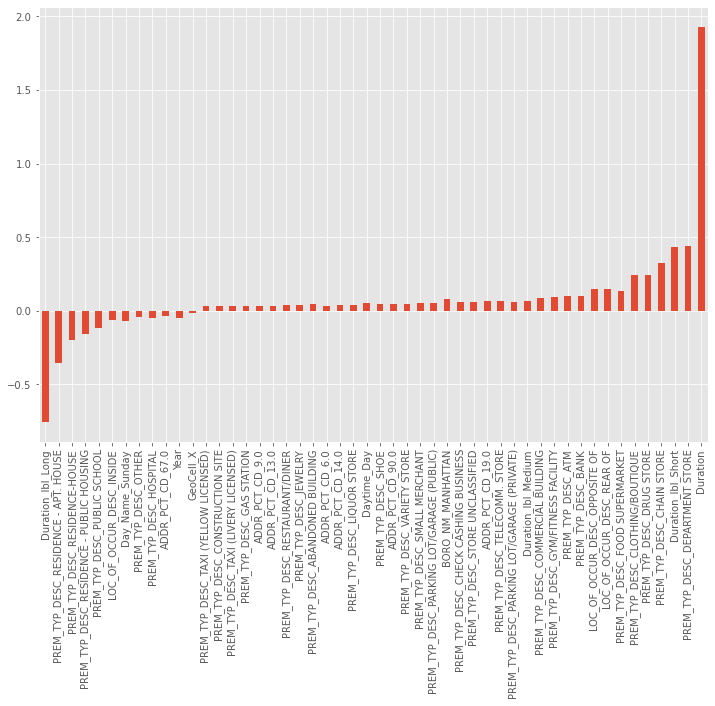

In [64]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=crime_sm.columns)
weights.plot(kind='bar', figsize = (12,8))  #added figsize - trying to see if it expands the view
plt.show()

### Trying SVC on full dataset - smaller variable list

In [99]:
# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    

In [100]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [101]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.7325871600269167
[[17421 18680]
 [12714 68584]]


In [102]:
# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,crime_sm.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

Duration_lbl_Long has weight of -0.7387390157704365
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of -0.34802457681694604
PREM_TYP_DESC_RESIDENCE-HOUSE has weight of -0.19878338498879536
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of -0.15581565203055509
PREM_TYP_DESC_PUBLIC SCHOOL has weight of -0.11701783890529509
Day_Name_Sunday has weight of -0.07110552122034838
LOC_OF_OCCUR_DESC_INSIDE has weight of -0.06438276239126973
Year has weight of -0.0537274555945655
PREM_TYP_DESC_HOSPITAL has weight of -0.04974628046281412
PREM_TYP_DESC_OTHER has weight of -0.0410629281854474
ADDR_PCT_CD_67.0 has weight of -0.03224992738426759
GeoCell_X has weight of -0.018384251619670836
PREM_TYP_DESC_TAXI (LIVERY LICENSED) has weight of 0.026086143348519334
ADDR_PCT_CD_13.0 has weight of 0.029401489807630684
PREM_TYP_DESC_CONSTRUCTION SITE has weight of 0.029725331992708146
PREM_TYP_DESC_TAXI (YELLOW LICENSED) has weight of 0.03159370404243893
ADDR_PCT_CD_9.0 has weight of 0.034202657799784604

In [103]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto', cache_size=1000) # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)


In [ ]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

## SVM (SVC) Model 1

Testing with a sample set

In [151]:
#Now I want to pare down the variables - cutting off at <> .03%
crime_sm_sample = crime_sample[['Duration_lbl_Long', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 
     'PREM_TYP_DESC_PUBLIC SCHOOL', 'LOC_OF_OCCUR_DESC_INSIDE', 'Day_Name_Sunday', 'PREM_TYP_DESC_OTHER', 'PREM_TYP_DESC_HOSPITAL', 
     'ADDR_PCT_CD_67.0', 'Year','GeoCell_X', 'PREM_TYP_DESC_TAXI (YELLOW LICENSED)', 'PREM_TYP_DESC_CONSTRUCTION SITE', 
     'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'PREM_TYP_DESC_GAS STATION', 'ADDR_PCT_CD_9.0', 'ADDR_PCT_CD_13.0', 'PREM_TYP_DESC_RESTAURANT/DINER', 
     'PREM_TYP_DESC_JEWELRY', 'PREM_TYP_DESC_ABANDONED BUILDING', 'ADDR_PCT_CD_6.0', 'ADDR_PCT_CD_14.0', 'PREM_TYP_DESC_LIQUOR STORE', 
     'Daytime_Day', 'PREM_TYP_DESC_SHOE', 'ADDR_PCT_CD_90.0', 'PREM_TYP_DESC_VARIETY STORE', 'PREM_TYP_DESC_SMALL MERCHANT', 
      'PREM_TYP_DESC_PARKING LOT/GARAGE (PUBLIC)', 'BORO_NM_MANHATTAN', 'PREM_TYP_DESC_CHECK CASHING BUSINESS', 
     'PREM_TYP_DESC_STORE UNCLASSIFIED', 'ADDR_PCT_CD_19.0', 'PREM_TYP_DESC_TELECOMM. STORE', 'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 
     'Duration_lbl_Medium', 'PREM_TYP_DESC_COMMERCIAL BUILDING', 'PREM_TYP_DESC_GYM/FITNESS FACILITY', 'PREM_TYP_DESC_ATM', 
      'PREM_TYP_DESC_BANK', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'LOC_OF_OCCUR_DESC_REAR OF', 'PREM_TYP_DESC_FOOD SUPERMARKET', 
     'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_DRUG STORE', 'PREM_TYP_DESC_CHAIN STORE', 'Duration_lbl_Short', 
     'PREM_TYP_DESC_DEPARTMENT STORE', 'Duration','NonViolent']]

In [152]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'NonViolent' in crime_sm_sample:
    y = crime_sm_sample['NonViolent'].values # get the labels we want
    del crime_sm_sample['NonViolent'] # get rid of the class label
    X = crime_sm_sample.values # use everything else to predict!#rerunning logistic regression with the smaller dataset of variables

In [153]:

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    


In [154]:


# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [155]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,crime_sm_sample.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.728
[[ 305  327]
 [ 217 1151]]
Duration_lbl_Long has weight of -0.5361915617390903
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of -0.3174142104315358
PREM_TYP_DESC_RESIDENCE-HOUSE has weight of -0.20245283333527536
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of -0.1654653285192775
PREM_TYP_DESC_PUBLIC SCHOOL has weight of -0.1306331322817641
LOC_OF_OCCUR_DESC_INSIDE has weight of -0.09490988709045273
Year has weight of -0.07105765232445976
Day_Name_Sunday has weight of -0.06547497955283497
PREM_TYP_DESC_HOSPITAL has weight of -0.052418151296446176
PREM_TYP_DESC_OTHER has weight of -0.04050064296059276
ADDR_PCT_CD_14.0 has weight of -0.028589389664188183
GeoCell_X has weight of -0.025535911455030078
ADDR_PCT_CD_67.0 has weight of -0.02524606869189631
PREM_TYP_DESC_GAS STATION has weight of -0.021835041583732086
ADDR_PCT_CD_13.0 has weight of -0.00933172355291619
PREM_TYP_DESC_ABANDONED BUILDING has weight of -0.00722264557416929
PREM_TYP_DESC_CONSTRUCTION SITE ha

In [156]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [157]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.7195
[[ 258  378]
 [ 183 1181]]


In [158]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(5224, 50)
(5224,)
[2460 2764]


### SVM (SVC) 'Linear'

In [159]:
# lets investigate SVMs on the data and play with the parameters and kernels - using LINEAR
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.721
[[ 390  246]
 [ 312 1052]]


In [160]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(5072, 50)
(5072,)
[2443 2629]


### SVM (SVC) adjusting cost

In [180]:
# lets investigate SVMs on the data and play with the parameters and kernels - using LINEAR
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=2.5, kernel='rbf', gamma='scale', cache_size=1000) # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.7265
[[ 313  323]
 [ 224 1140]]


In [167]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(5185, 50)
(5185,)
[2416 2769]
